In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.contingency_tables import StratifiedTable
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [8]:
df = pd.read_csv('hw_aa.csv', sep=';', index_col=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

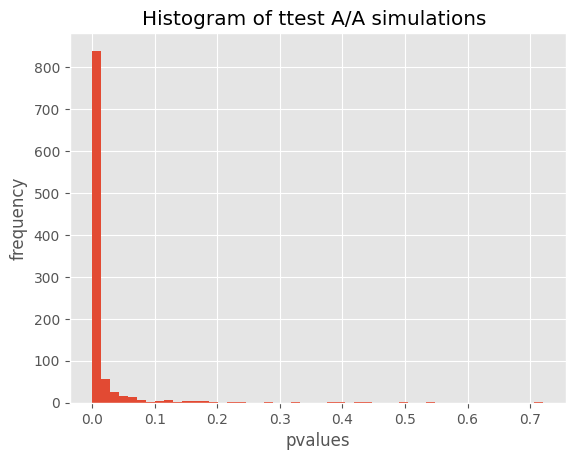

0.927

In [9]:
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant == 0').purchase.sample(n_s, replace = False).values
    s2 = df.query('experimentVariant == 1').purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [32]:
StratifiedTable.from_data('purchase', 'experimentVariant', 'version', df).summary()

,Estimate,LCB,UCB
Pooled odds,2.300,2.161,2.447
Pooled log odds,0.833,0.771,0.895
Pooled risk ratio,1.657,,
,,,
,Statistic,P-value,
Test of OR=1,734.655,0.000,
Test constant OR,1256.880,0.000,
,,,
Number of tables,4,,
Min n,8425,,


In [40]:
(
    df
    .groupby(['experimentVariant', 'version'], as_index=False)
    .agg(
        obs = ('purchase', 'count'),
        conversion = ('purchase', 'mean')
    )
    .sort_values('version')
)

,experimentVariant,version,obs,conversion
0,0,v2.8.0,41283,0.000993
4,1,v2.8.0,41552,0.045606
1,0,v2.9.0,11921,0.074658
5,1,v2.9.0,12033,0.071304
2,0,v3.7.4.0,4204,0.059943
6,1,v3.7.4.0,4221,0.063018
3,0,v3.8.0.0,5694,0.057604
7,1,v3.8.0.0,6110,0.062848


  0%|          | 0/1000 [00:00<?, ?it/s]

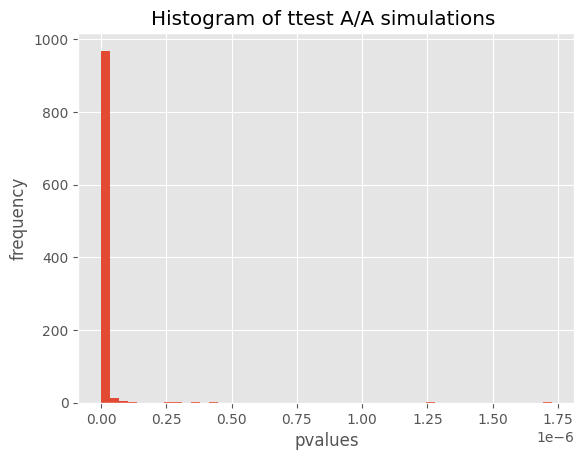

1.0

In [42]:
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant == 0 and version == "v2.8.0"').purchase.sample(n_s, replace = False).values
    s2 = df.query('experimentVariant == 1 and version == "v2.8.0"').purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [47]:
df.query('experimentVariant == "0" and version == "v2.8.0"').experimentVariant.unique()

array([], dtype=int64)